# Importing Libraries

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

# Importing Dataset

In [20]:
# Define tickers

tickers = {
    'Energy': ['XOM', 'CVX', 'COP'],
    'Healthcare': ['JNJ', 'PFE', 'MRK'],
    'IT': ['AAPL', 'MSFT', 'GOOGL']
}

flat_tickers = [ticker for sector in tickers.values() for ticker in sector]

# Download daily adjusted prices

data = yf.download(flat_tickers, start='2010-01-01', end='2022-12-31', auto_adjust=True)

# Inspect columns to see what is available
print(data.columns)

[*********************100%***********************]  9 of 9 completed

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',   'COP'),
            ( 'Close',   'CVX'),
            ( 'Close', 'GOOGL'),
            ( 'Close',   'JNJ'),
            ( 'Close',   'MRK'),
            ( 'Close',  'MSFT'),
            ( 'Close',   'PFE'),
            ( 'Close',   'XOM'),
            (  'High',  'AAPL'),
            (  'High',   'COP'),
            (  'High',   'CVX'),
            (  'High', 'GOOGL'),
            (  'High',   'JNJ'),
            (  'High',   'MRK'),
            (  'High',  'MSFT'),
            (  'High',   'PFE'),
            (  'High',   'XOM'),
            (   'Low',  'AAPL'),
            (   'Low',   'COP'),
            (   'Low',   'CVX'),
            (   'Low', 'GOOGL'),
            (   'Low',   'JNJ'),
            (   'Low',   'MRK'),
            (   'Low',  'MSFT'),
            (   'Low',   'PFE'),
            (   'Low',   'XOM'),
            (  'Open',  'AAPL'),
            (  'Open',   'COP'),
            (  'Open',   'CVX'),
          

In [21]:
# Select 'Close' price

data = data['Close']

In [22]:
print(data.head(3))

Ticker          AAPL        COP        CVX      GOOGL        JNJ        MRK  \
Date                                                                          
2010-01-04  6.424605  23.181879  42.134502  15.576999  40.675068  20.788479   
2010-01-05  6.435713  23.203909  42.432961  15.508402  40.203423  20.872742   
2010-01-06  6.333345  23.371450  42.438286  15.117455  40.530426  21.153584   

Ticker           MSFT       PFE        XOM  
Date                                        
2010-01-04  23.173340  9.519681  38.213131  
2010-01-05  23.180826  9.383902  38.362347  
2010-01-06  23.038576  9.353728  38.693893  


# Plot Prices

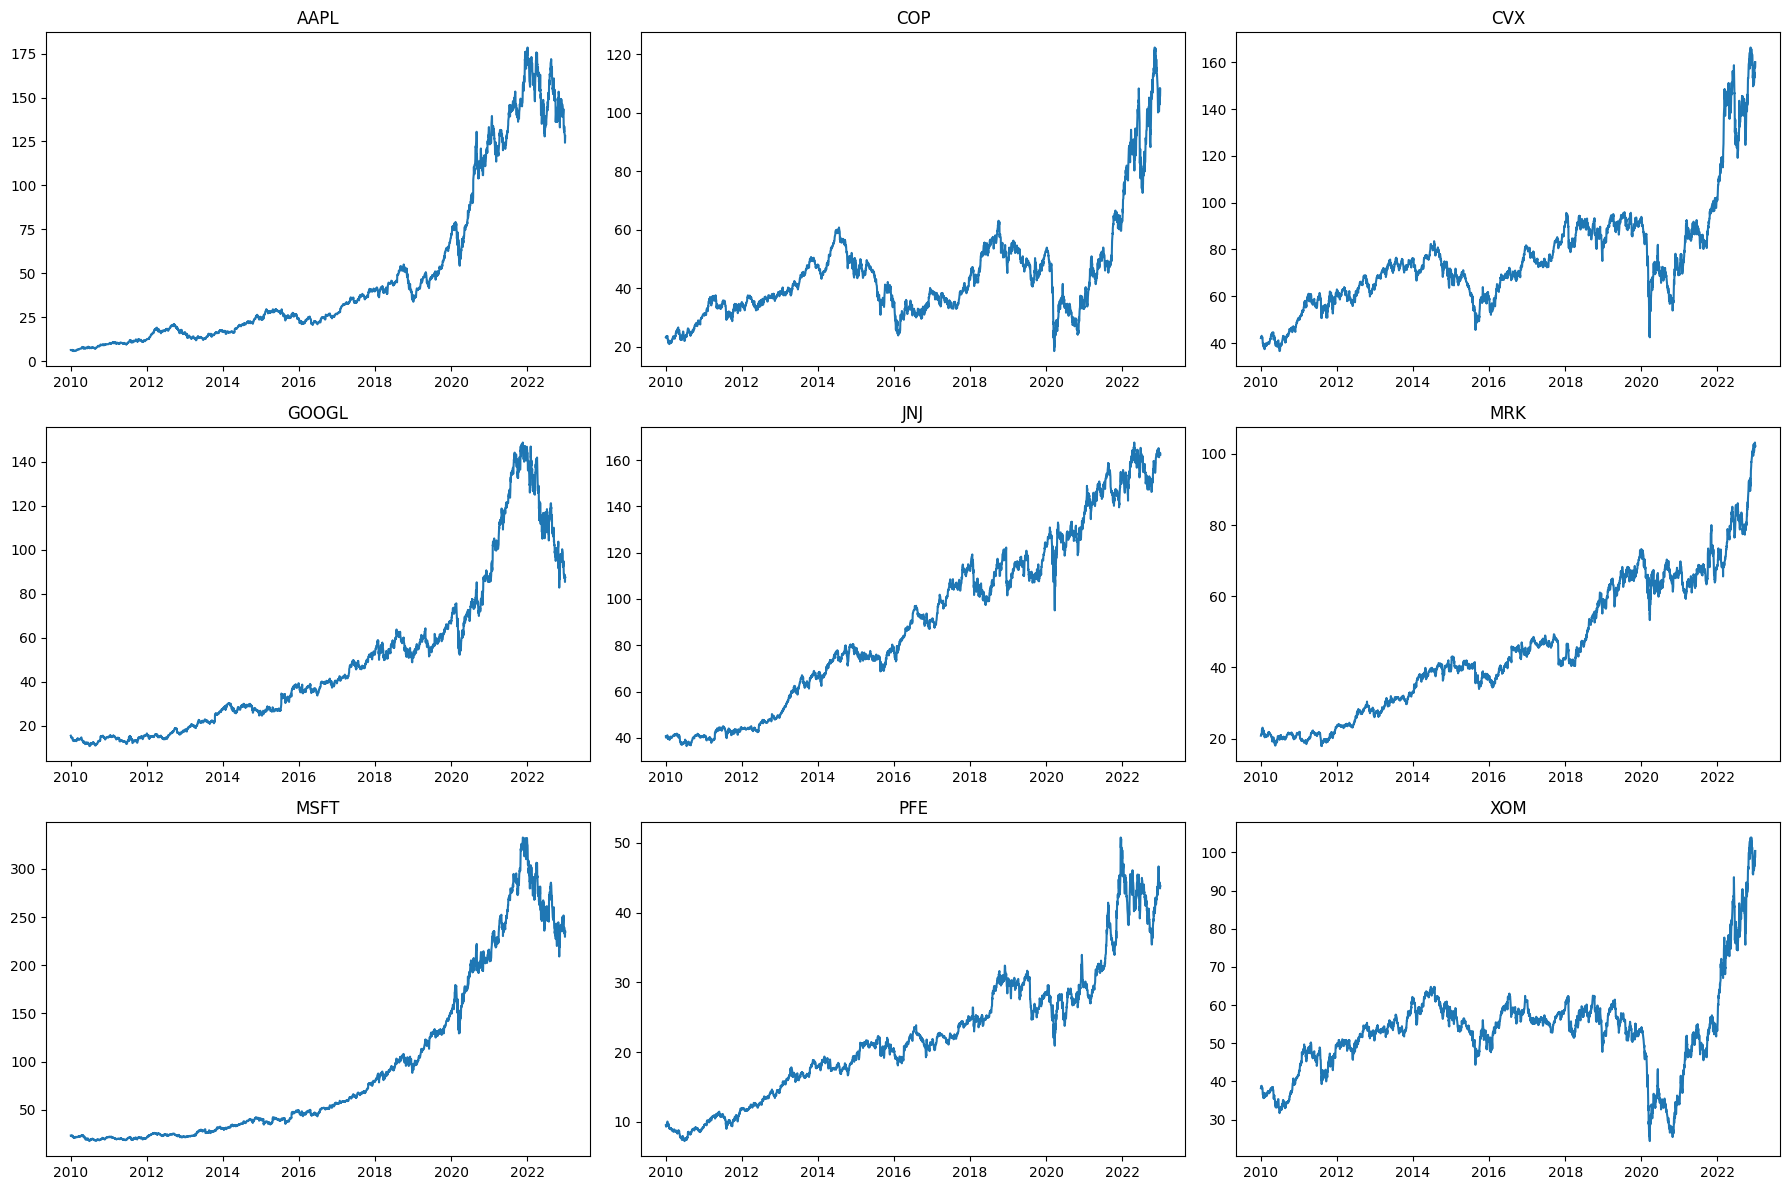

In [23]:
# Plot daily prices (3x3)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)
num_tickers = len(data.columns)

for i, ticker in enumerate(data.columns):
    axes[i].plot(data.index, data[ticker])
    axes[i].set_title(ticker)

# Hide unused axes

for j in range(num_tickers, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

All stock price series display a clear upward trend over time, especially IT stocks. This indicates non-stationarity, meaning the mean and variance of the series are not constant over time.

*   IT stocks (AAPL, MSFT, GOOGL) show strong and consistent growth from 2010 to 2022, with much steeper trends than Energy or Healthcare.
*   Energy stocks (XOM, CVX, COP) exhibit higher relative volatility, with noticeable drops during oil price shocks (e.g., 2014–2016).
*   Healthcare stocks (JNJ, PFE, MRK) have fewer extreme movements compared to Energy.
*   Market corrections (e.g., 2020 COVID-19 crash) are visible across all sectors, but the impact varies: IT is less affected, Energy more severely.



# Plot simple returns

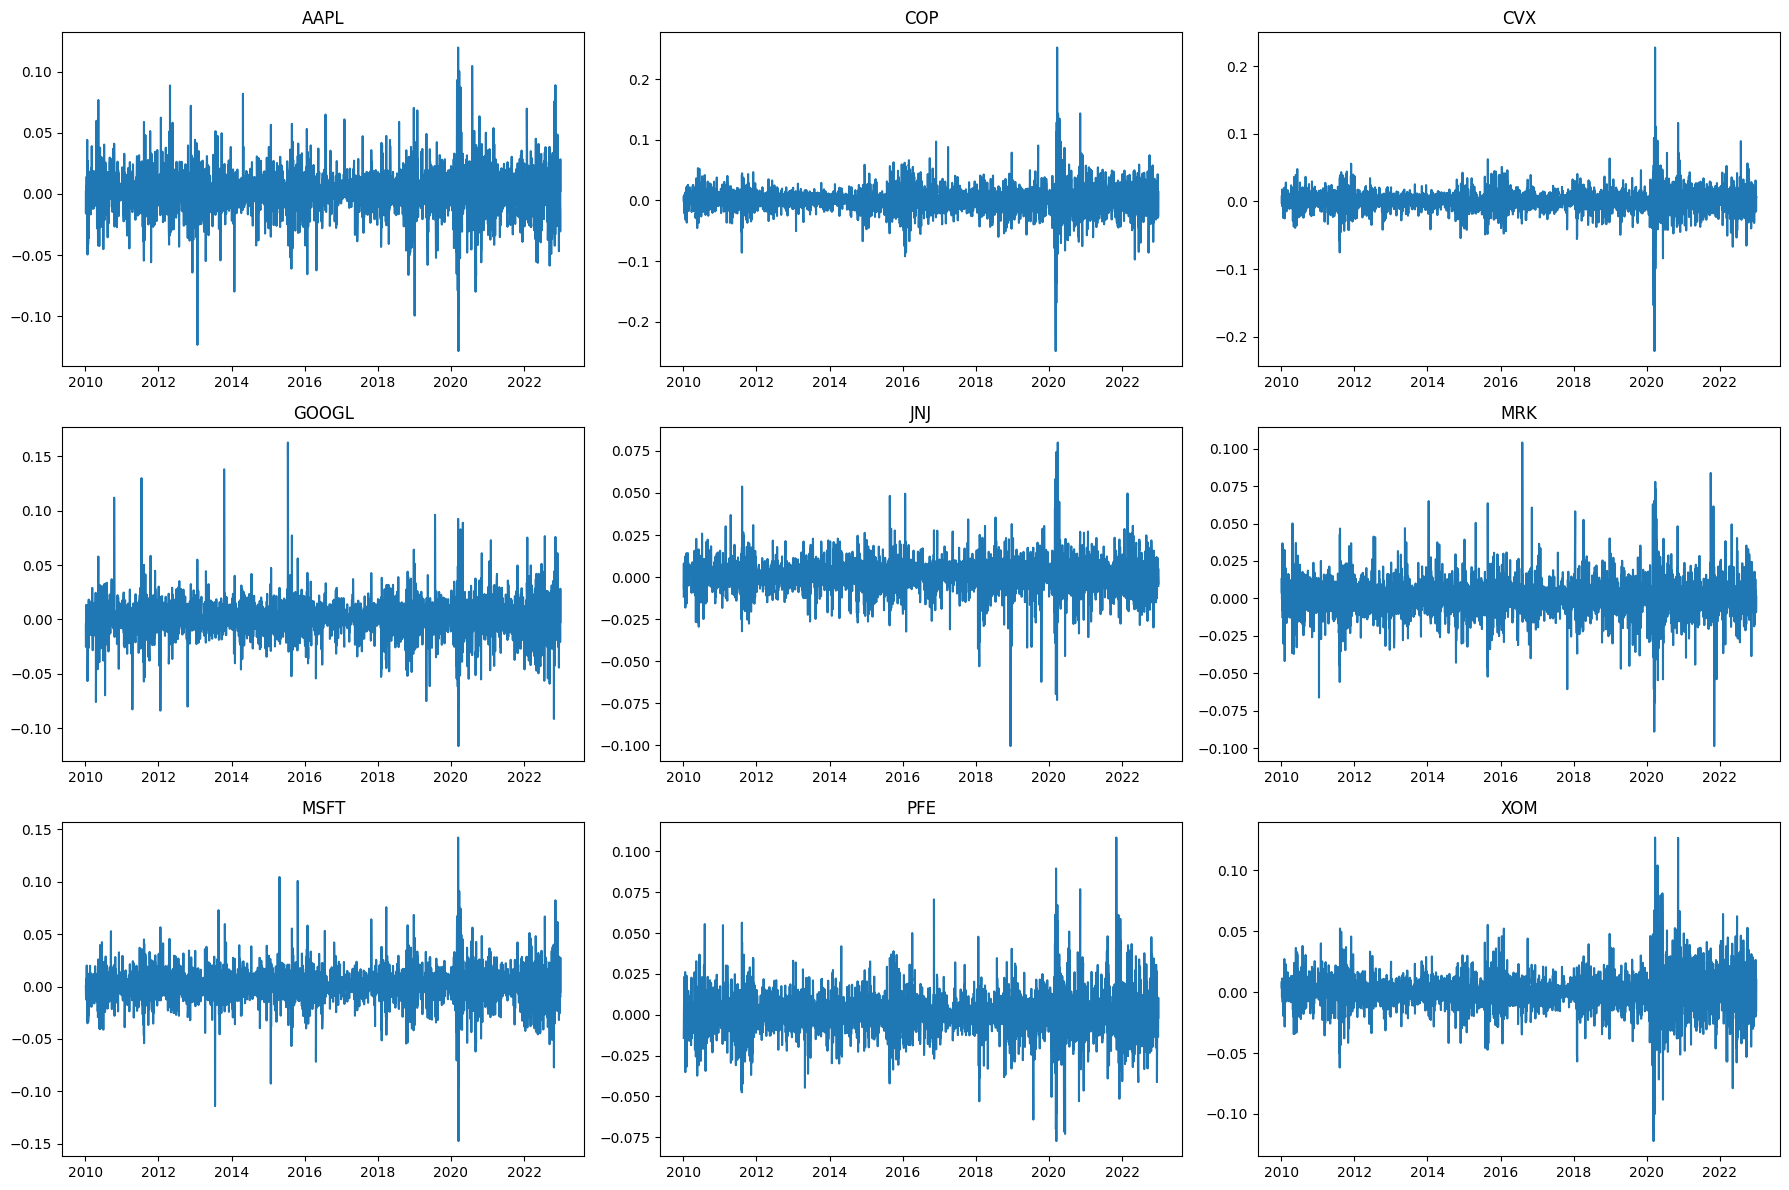

In [24]:
# Calculate daily returns

returns = data.pct_change().dropna()

# Plot returns (3x3)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)
num_tickers = len(returns.columns)

for i, ticker in enumerate(returns.columns):
    axes[i].plot(returns.index, returns[ticker])
    axes[i].set_title(ticker)

for j in range(num_tickers, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Plot Boxplots

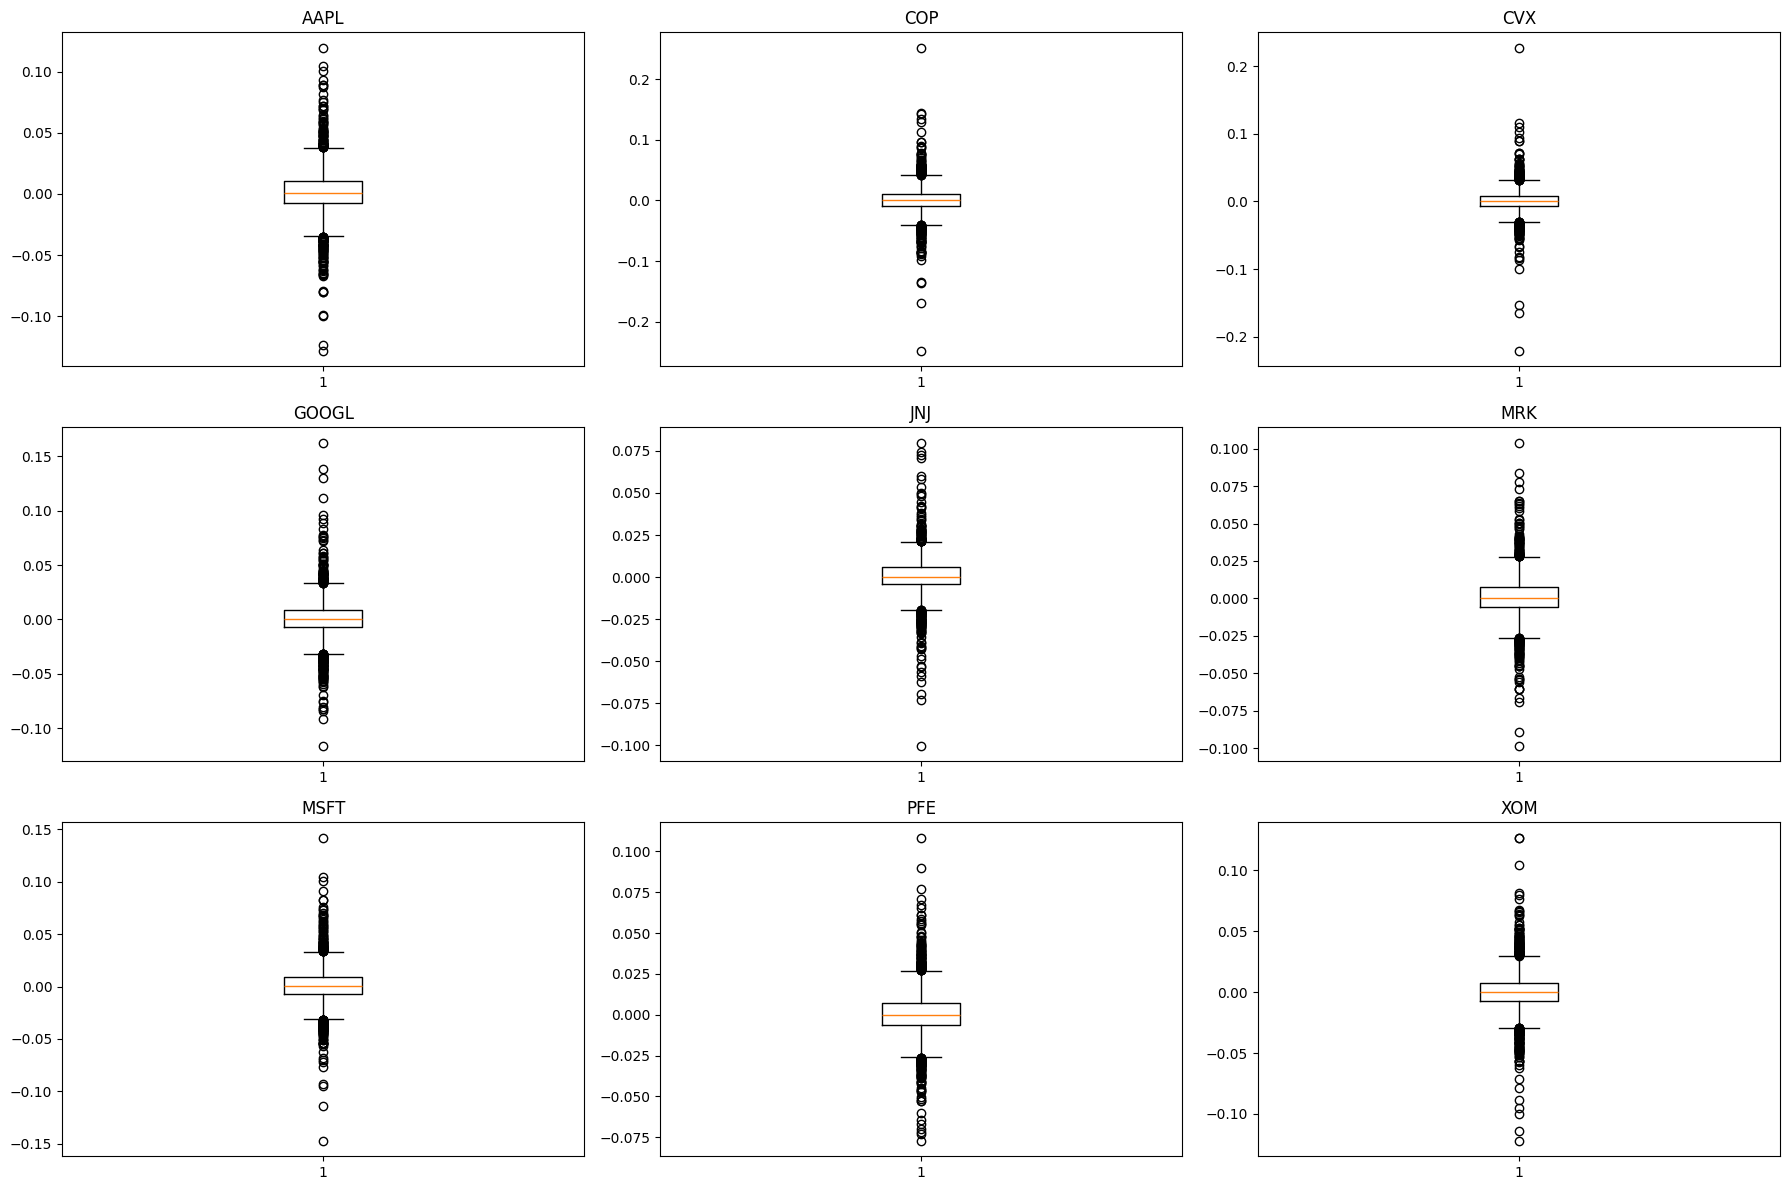

In [12]:
# Boxplots of returns (3x3)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)
num_tickers = len(returns.columns)

for i, ticker in enumerate(returns.columns):
    axes[i].boxplot(returns[ticker])
    axes[i].set_title(ticker)

for j in range(num_tickers, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Boxplots reveal outliers, more frequently in Energy.

The median daily return is close to zero for all sectors, consistent with efficient market behavior.

# Plot Histograms

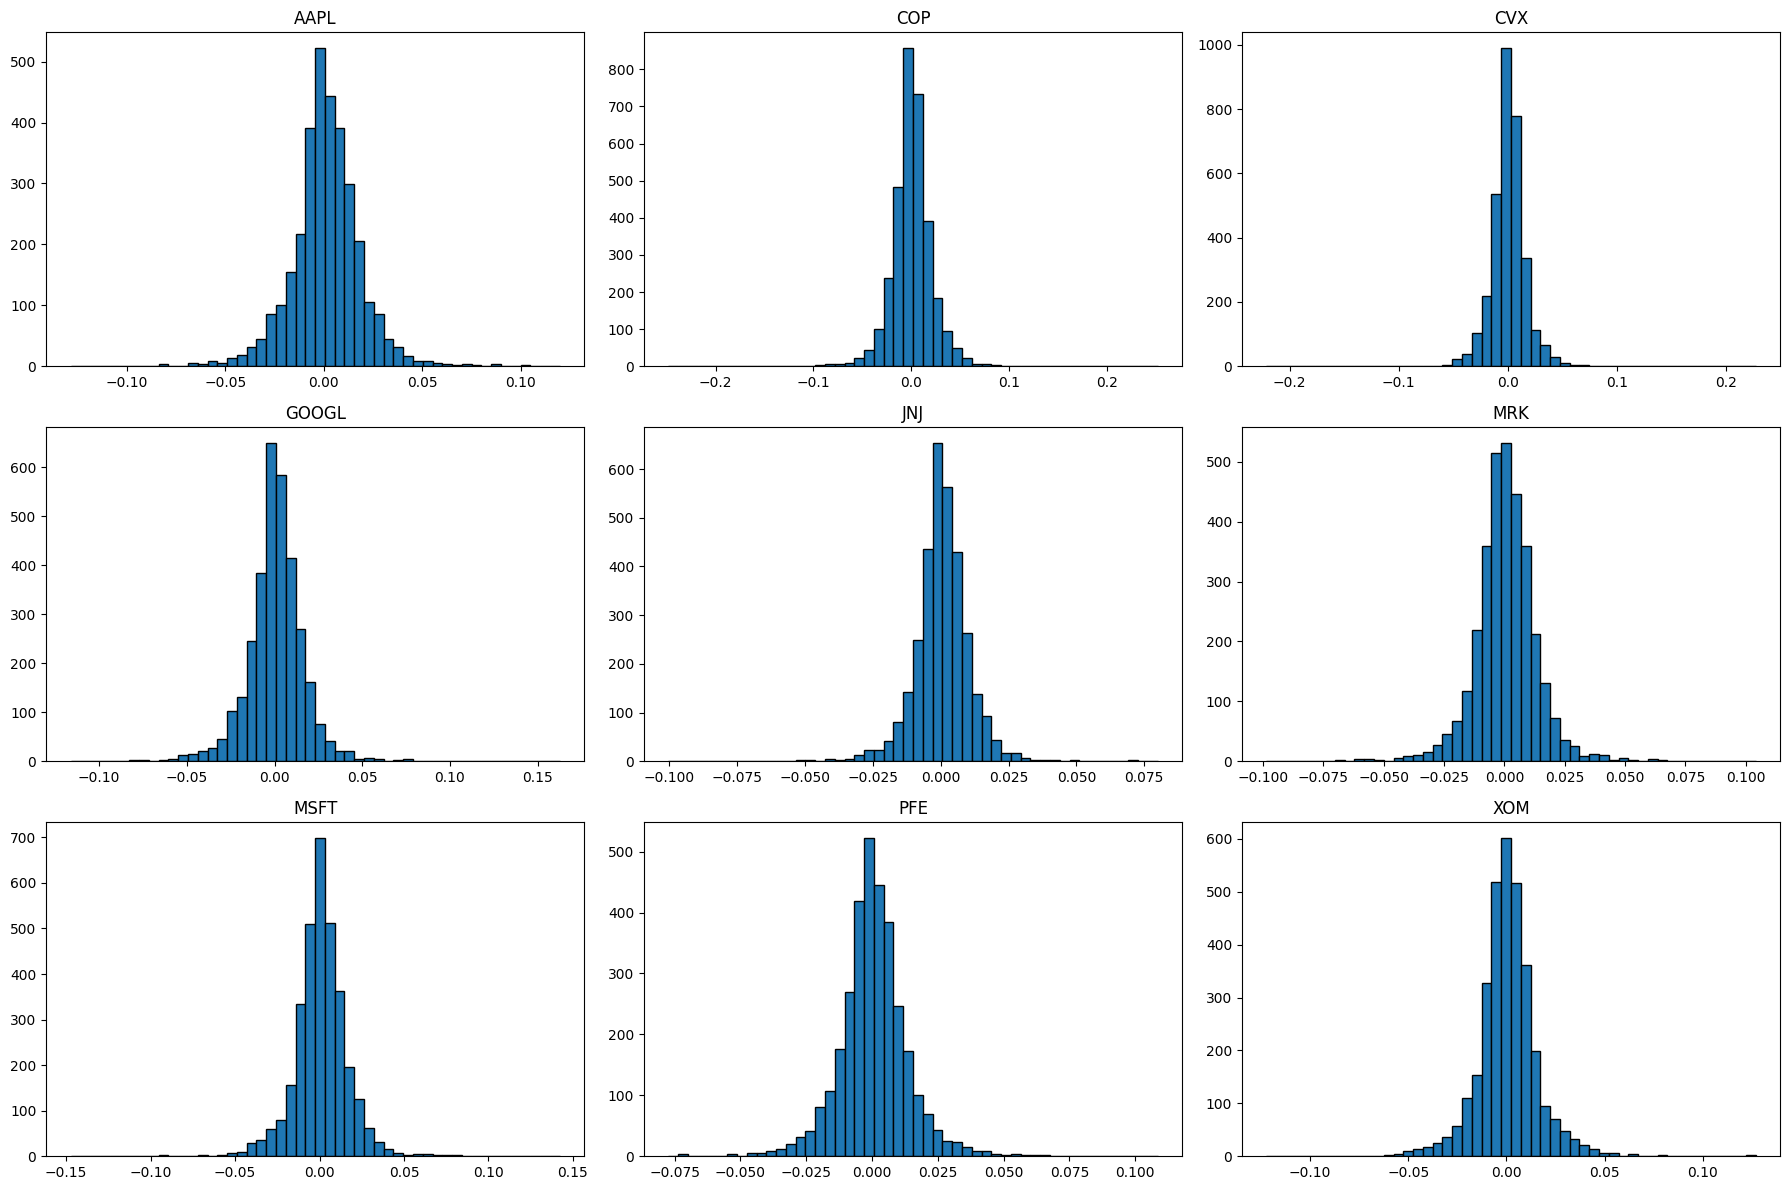

In [17]:
# Histograms of returns (3x3)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)
num_tickers = len(returns.columns)

for i, ticker in enumerate(returns.columns):
    axes[i].hist(returns[ticker], bins=50, edgecolor='black')
    axes[i].set_title(ticker)

for j in range(num_tickers, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Return distributions are not perfectly normal.
Mean is near zero.

# Calculate skewness and kurtosis

In [18]:
# Skewness and kurtosis

stats_df = pd.DataFrame(index=returns.columns)
stats_df['Skewness'] = returns.apply(skew)
stats_df['Kurtosis'] = returns.apply(kurtosis)

print("Skewness and Kurtosis of daily returns:")
print(stats_df)

Skewness and Kurtosis of daily returns:
        Skewness   Kurtosis
Ticker                     
AAPL   -0.056382   5.098228
COP     0.030971  15.351855
CVX    -0.215242  24.504479
GOOGL   0.438899   8.928002
JNJ    -0.195704   9.558540
MRK     0.091006   6.501436
MSFT    0.033564   8.065627
PFE     0.281557   5.219318
XOM     0.053161   7.695976


Most stocks have skewness near zero, so returns are roughly symmetric, with GOOGL and PFE slightly positively skewed, and CVX and JNJ slightly negatively skewed.

Kurtosis is above 3 for all stocks, indicating fat tails and a higher probability of extreme returns than normal. Energy stocks (CVX, COP, XOM) show particularly high kurtosis, reflecting their greater volatility and sensitivity to shocks.

Overall, returns are non-normal, especially for Energy, while IT and Healthcare are moderately leptokurtic.